In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

# Знакомство с данными

## Иерархия

In [2]:
hierarchy = pd.read_csv('pr_df.csv')

In [3]:
display(hierarchy)

,pr_sku_id,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
0,fd064933250b0bfe4f926b867b0a5ec8,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
1,71c9661741caf40a92a32d1cc8206c04,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17
2,00b72c2f01a1512cbb1d3f33319bac93,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,d407a3ebb4ab9b0d68b224486f8b8dad,17
3,9bc40cd2fe4f188f402bb41548c5e15c,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
4,3a74a370c8eb032acb11ad9119242b8f,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17
...,...,...,...,...,...
2045,2c3b895d9fccc33226fee2c521618893,c74d97b01eae257e44aa9d5bade97baf,a2cc63e065705fe938a4dda49092966f,4589b8f516d28558b3850c37776cadc8,1
2046,6058d6b7d1f04803d15d1896d3256c92,6512bd43d9caa6e02c990b0a82652dca,e58cc5ca94270acaceed13bc82dfedf7,c0a667df8f0d6ee98dda972b0870fabf,1
2047,3beeab85046ca201d73bb9d129bcfc3f,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,34d2777e78ccf007523e2dd1fcea6b2d,17
2048,b9e2f33d70ffb02d6d04f470da2e45c9,aab3238922bcc25a6f606eb525ffdc56,3de2334a314a7a72721f1f74a6cb4cee,0f3abfd67959c079e7b3759440e7415c,17


In [4]:
print(hierarchy['pr_uom_id'].value_counts())

1     1279
17     771
Name: pr_uom_id, dtype: int64


In [5]:
for i in hierarchy.columns:
    print(hierarchy[i].nunique())

2050
9
43
170
2


### Деление товаров на категории

In [6]:
by_piece = hierarchy['pr_sku_id'][hierarchy['pr_uom_id']==1] 

In [7]:
print(by_piece)

36      ae0ea26efd73c891f6fe4f8af687c88f
37      ebef63de0e8fe04e0d681a25face55c9
38      e983f56659b43d6691446b013c0b9ef1
39      c4a665596d4f67cecb7542c9fad407ee
41      90702dbda20da8380fb559b1ea8c0140
                      ...               
2039    d962f4c1389fcacf76200b0fd64a3308
2044    40db0970677f1f9ba660753f0baa7d00
2045    2c3b895d9fccc33226fee2c521618893
2046    6058d6b7d1f04803d15d1896d3256c92
2049    dbfce512dcdabc6b6e2724b6ec44efda
Name: pr_sku_id, Length: 1279, dtype: object


## Продажи

In [8]:
sales = pd.read_csv('sales_df_train.csv')
display(sales)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0
...,...,...,...,...,...,...,...,...
883010,c81e728d9d4c2f636f067f89cc14862c,a0150fefa71d6606d5e642fa0e7b8ad8,2022-12-13,1,1.0,1.0,33.0,33.0
883011,42a0e188f5033bc65bf8d78622277c4e,5b146d93f822459260216df28e572eca,2023-04-18,0,1.0,0.0,192.0,0.0
883012,42a0e188f5033bc65bf8d78622277c4e,c8bd18ea08d2f47cb0a7992f11ada9de,2022-08-16,0,5.0,0.0,970.0,0.0
883013,f7e6c85504ce6e82442c770f7c8606f0,b960c6ee5b5efa12e73f810204b561a8,2023-04-23,0,4.0,0.0,262.0,0.0


In [9]:
sales.dtypes

st_id                       object
pr_sku_id                   object
date                        object
pr_sales_type_id             int64
pr_sales_in_units          float64
pr_promo_sales_in_units    float64
pr_sales_in_rub            float64
pr_promo_sales_in_rub      float64
dtype: object

In [10]:
print(sales['date'].value_counts())

2022-12-30    3396
2022-12-29    3322
2022-12-24    3233
2022-12-28    3126
2023-06-23    3033
              ... 
2023-01-03    2083
2023-04-17    2070
2023-01-09    2041
2023-01-02    1950
2023-01-01    1182
Name: date, Length: 352, dtype: int64


### разделение товаров на поштучные и весовые

1й вариант. 

In [11]:
display(sales[sales['pr_sku_id'].isin(by_piece)])

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0
6,f7e6c85504ce6e82442c770f7c8606f0,b75c7cbf7accdaea8a1a14781bb29870,2023-02-15,0,0.0,0.0,171.0,0.0
10,42a0e188f5033bc65bf8d78622277c4e,58ebafabd92e2e3a80d86b7bb7e88eda,2022-09-18,0,2.0,0.0,361.0,0.0
...,...,...,...,...,...,...,...,...
883007,1ecfb463472ec9115b10c292ef8bc986,de3d8d525e0bdfbf16812b2897c391bb,2023-05-23,1,1.0,1.0,131.0,131.0
883008,f7e6c85504ce6e82442c770f7c8606f0,0477944bbda88dbf89b8af9d645740c3,2023-03-19,0,2.0,0.0,493.0,0.0
883009,42a0e188f5033bc65bf8d78622277c4e,029905c5542302a69b170c91e96f5a14,2023-03-12,0,1.0,0.0,74.0,0.0
883011,42a0e188f5033bc65bf8d78622277c4e,5b146d93f822459260216df28e572eca,2023-04-18,0,1.0,0.0,192.0,0.0


2й вариант

In [12]:
display(sales[~sales['pr_sku_id'].isin(by_piece)])

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
5,42a0e188f5033bc65bf8d78622277c4e,3474f0e025c7deb7e127a35763bc5512,2022-11-03,0,3.0,0.0,123.0,0.0
7,1ecfb463472ec9115b10c292ef8bc986,f5c4b08ce07d102062c2947967ad750e,2023-02-05,0,2.0,0.0,65.0,0.0
8,1ecfb463472ec9115b10c292ef8bc986,c2155d600945587d417fe45ba5bf6d57,2023-05-09,0,1.0,0.0,124.0,0.0
...,...,...,...,...,...,...,...,...
882998,f7e6c85504ce6e82442c770f7c8606f0,22988026fe85fde60d8bf777ab6bc3b4,2023-06-04,1,4.0,4.0,262.0,262.0
883006,6364d3f0f495b6ab9dcf8d3b5c6e0b01,771d9ed245872c553b1472e9f43e1860,2022-11-01,1,2.0,2.0,61.0,61.0
883010,c81e728d9d4c2f636f067f89cc14862c,a0150fefa71d6606d5e642fa0e7b8ad8,2022-12-13,1,1.0,1.0,33.0,33.0
883013,f7e6c85504ce6e82442c770f7c8606f0,b960c6ee5b5efa12e73f810204b561a8,2023-04-23,0,4.0,0.0,262.0,0.0


### Отрицательные продажи - нужен комментарий! 

In [13]:
display(sales[(sales['pr_sales_in_rub']<0) | (sales['pr_promo_sales_in_rub']<0)])

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
7919,6364d3f0f495b6ab9dcf8d3b5c6e0b01,13928e132e7e0e55a0a8a6f0fd539758,2022-09-29,0,-1.0,0.0,-763.0,0.0
11635,fa7cdfad1a5aaf8370ebeda47a1ff1c3,b66f2459d3013603d5c924ee370093c8,2023-06-12,1,-2.0,-2.0,-344.0,-344.0
21385,fa7cdfad1a5aaf8370ebeda47a1ff1c3,9aa7008fa27151bf77be5f4c9d023d5f,2023-04-06,0,-2.0,0.0,-48.0,0.0
30000,6364d3f0f495b6ab9dcf8d3b5c6e0b01,364196813f3b746270a9b27bd76149c9,2023-04-21,0,-1.0,0.0,-182.0,0.0
43146,f7e6c85504ce6e82442c770f7c8606f0,699dc7822b719137e8124b728ab45fa3,2022-11-10,1,-0.0,-0.0,-32.0,-32.0
...,...,...,...,...,...,...,...,...
815057,1ecfb463472ec9115b10c292ef8bc986,c82dccf4ccf7017ba622a86f5dcbc736,2022-12-19,1,-3.0,-3.0,-454.0,-454.0
849426,c81e728d9d4c2f636f067f89cc14862c,4ce0eb956648ab3ff6bb0afa3158cc42,2023-01-31,0,-0.0,0.0,-51.0,0.0
856454,42a0e188f5033bc65bf8d78622277c4e,5ca106c323e777ec8b42dbbab099932c,2022-10-21,0,-8.0,0.0,-409.0,0.0
866176,16a5cdae362b8d27a1d8f8c7b78b4330,b067862254b74824193087f2a16c0c79,2023-05-26,1,-4.0,-4.0,-2430.0,-2430.0


### Суммы из воздуха

In [14]:
filtered_sales = sales[(sales['pr_sales_in_units'] == 0) & (sales['pr_promo_sales_in_units'] == 0)]
display(filtered_sales)


,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
6,f7e6c85504ce6e82442c770f7c8606f0,b75c7cbf7accdaea8a1a14781bb29870,2023-02-15,0,0.0,0.0,171.0,0.0
27,42a0e188f5033bc65bf8d78622277c4e,cfb54b1ce12bb3f9b6b9e2ea0b57414b,2022-11-10,0,0.0,0.0,91.0,0.0
28,f7e6c85504ce6e82442c770f7c8606f0,88d7313785c97631bf3df61e70636491,2022-11-30,0,0.0,0.0,79.0,0.0
32,fa7cdfad1a5aaf8370ebeda47a1ff1c3,b610088ddf586449793d3c6da70d4c56,2023-02-26,0,0.0,0.0,83.0,0.0
...,...,...,...,...,...,...,...,...
882978,fa7cdfad1a5aaf8370ebeda47a1ff1c3,a1f93a1aeb02759147d69276c70217db,2023-06-07,1,0.0,0.0,30.0,30.0
882979,6364d3f0f495b6ab9dcf8d3b5c6e0b01,cda72490a16c471e7a192a956f476e95,2023-04-11,0,0.0,0.0,62.0,0.0
882991,16a5cdae362b8d27a1d8f8c7b78b4330,7d945116ed12c2807d081df6f666ba37,2023-07-01,1,0.0,0.0,70.0,70.0
883004,42a0e188f5033bc65bf8d78622277c4e,143f62003066d8d4cc33d3e9161d114d,2022-12-25,1,0.0,0.0,41.0,41.0


## Образец подаваемых данных

In [15]:
example = pd.read_csv('sales_submission.csv')
display(example)

,st_id,pr_sku_id,date,target
0,16a5cdae362b8d27a1d8f8c7b78b4330,0045ebdb1069ff4b3dd3efe628c39cd3,2023-07-20,0
1,16a5cdae362b8d27a1d8f8c7b78b4330,00661699f543753ec7e911a64b9fd2f6,2023-07-20,0
2,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,2023-07-20,0
3,16a5cdae362b8d27a1d8f8c7b78b4330,0169529ff660adcac9b7e354e0c4b882,2023-07-20,0
4,16a5cdae362b8d27a1d8f8c7b78b4330,01e4734745e97e52d3213449e1a05dd7,2023-07-20,0
...,...,...,...,...
43689,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fd519eb13005448a303df1089505a42b,2023-08-01,0
43690,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fdb89dfd1a27256904eb5a5734252102,2023-08-01,0
43691,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fe50ae64d08d4f8245aaabc55d1baf79,2023-08-01,0
43692,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fe5d18ae6650335830e4c1dbd9e6ddb9,2023-08-01,0


## Магазины

In [16]:
store = pd.read_csv('st_df.csv')
display(store)

,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,1aa057313c28fa4a40c5bc084b11d276,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,19,0
1,bd470ca955d9497bbcb808e59952fffc,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,19,1
2,6364d3f0f495b6ab9dcf8d3b5c6e0b01,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
3,1ecfb463472ec9115b10c292ef8bc986,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,2,1,28,1
4,16a5cdae362b8d27a1d8f8c7b78b4330,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1,2,8,1
5,53e19f3dbb211f20b20b45668303c1b6,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,20,1
6,42a0e188f5033bc65bf8d78622277c4e,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
7,c81e728d9d4c2f636f067f89cc14862c,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1
8,fa7cdfad1a5aaf8370ebeda47a1ff1c3,885fe656777008c335ac96072a45be15,296bd0cc6e735f9d7488ebc8fbc19130,1,1,12,1
9,f7e6c85504ce6e82442c770f7c8606f0,3202111cf90e7c816a472aaceb72b0df,32586311f16876abf92901085bd87b99,1,1,12,1


# Первые дропы

## Магазины

Удаляем данные о продажах в неработающих магазинах

In [17]:
stores_to_drop = store['st_id'][store['st_is_active']==0]
print(stores_to_drop)

0     1aa057313c28fa4a40c5bc084b11d276
10    62f91ce9b820a491ee78c108636db089
Name: st_id, dtype: object


In [18]:
sales = sales[~sales['st_id'].isin(stores_to_drop)]
display(sales)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0
...,...,...,...,...,...,...,...,...
883010,c81e728d9d4c2f636f067f89cc14862c,a0150fefa71d6606d5e642fa0e7b8ad8,2022-12-13,1,1.0,1.0,33.0,33.0
883011,42a0e188f5033bc65bf8d78622277c4e,5b146d93f822459260216df28e572eca,2023-04-18,0,1.0,0.0,192.0,0.0
883012,42a0e188f5033bc65bf8d78622277c4e,c8bd18ea08d2f47cb0a7992f11ada9de,2022-08-16,0,5.0,0.0,970.0,0.0
883013,f7e6c85504ce6e82442c770f7c8606f0,b960c6ee5b5efa12e73f810204b561a8,2023-04-23,0,4.0,0.0,262.0,0.0


In [19]:
print(sales['st_id'].value_counts())

c81e728d9d4c2f636f067f89cc14862c    174687
16a5cdae362b8d27a1d8f8c7b78b4330    157542
42a0e188f5033bc65bf8d78622277c4e    140286
f7e6c85504ce6e82442c770f7c8606f0    124145
6364d3f0f495b6ab9dcf8d3b5c6e0b01    115830
fa7cdfad1a5aaf8370ebeda47a1ff1c3    110537
1ecfb463472ec9115b10c292ef8bc986     47404
53e19f3dbb211f20b20b45668303c1b6      9231
bd470ca955d9497bbcb808e59952fffc      2586
084a8a9aa8cced9175bd07bc44998e75        38
Name: st_id, dtype: int64


Меньше 1000 значений отвалилось. То есть мало данных были из неактивных магазинов. Хорошо, что на этом мало данных теряем. 

Я бы за одно дропнул данные с последнего, а то и 2 магазинов. 38 продаж ничего нам не дадут, но и 2586 продаж тоже ерунда, особенно если размазаны на много товаров. Придется проверять. 

In [20]:
display(sales[sales['st_id']=='bd470ca955d9497bbcb808e59952fffc']['pr_sku_id'].value_counts().head(30))

861f516882af16ff45234407eda09606    270
ee21c04f96ab30a8b3ca761e57e016ca    198
de96549fe7e95032ca74cf83e70eded2    195
c82dccf4ccf7017ba622a86f5dcbc736    141
abbcffeaf2c914f4e61d119f7b95cf35    138
21c11f1628b35916baddf033b748940c    123
025967a3c53711dc29a78cbecc908ecd    119
5f420eb30e2c5353be58952c969965fd    106
b26ff8347bfe16de1873590500ce1df8     94
c094d01a05c16145a507b8a2b840a4f0     94
e4d5fdbba51406e917f26f3522c513be     88
033013f94a18c066e8b3d610bed34bee     81
9bf41ccdcb3d361472efb9284962df17     79
4eb42cea3a5dc6b89f5e608a9d8d9cf0     68
f32fd3acc6b050e411d97e4235b12102     50
cb822ecde73d4362a6dccf0595a83cbd     49
8cc3c766285e320aef48183a4bbe22d1     47
4695acecbef4734453cf9bc0be67ffe4     47
b8c6ab77596800a8789ae53ab6173e34     37
48e0c6769ad81d409a06471678920e2b     35
4888d22310be911500c00611a9dd44eb     29
7b6ba6ad2c09b8b003c63012d476359e     28
b07cc226d71885e00736dc1adfc8d701     25
711a1dcfd5b73a780173613120828ac0     24
0f152427918d29bb1081834c1d375a48     21


Да, это размазано на 85 товаров и и них более-менне постоянный спрос всего на 20 товаров. 

я заметил, что 2 неактивных магазина и 3 магазина с наименьшим количеством продаж имеют статус 4. Может, их тоже дропнуть все во имя кластеризации? Предварительно просмотрим 3й с конца магазин...

In [21]:
display(sales[sales['st_id']=='53e19f3dbb211f20b20b45668303c1b6']['pr_sku_id'].value_counts().head(30))

c82dccf4ccf7017ba622a86f5dcbc736    521
21c11f1628b35916baddf033b748940c    494
861f516882af16ff45234407eda09606    468
ee21c04f96ab30a8b3ca761e57e016ca    418
b26ff8347bfe16de1873590500ce1df8    357
abbcffeaf2c914f4e61d119f7b95cf35    252
de96549fe7e95032ca74cf83e70eded2    246
c094d01a05c16145a507b8a2b840a4f0    242
025967a3c53711dc29a78cbecc908ecd    239
5f420eb30e2c5353be58952c969965fd    208
f32fd3acc6b050e411d97e4235b12102    197
e4d5fdbba51406e917f26f3522c513be    195
7573524fe31ce7272681364786e1e788    195
50facd9b2f8f883f238423203a7d96eb    195
4eb42cea3a5dc6b89f5e608a9d8d9cf0    192
3a74a370c8eb032acb11ad9119242b8f    181
cb822ecde73d4362a6dccf0595a83cbd    173
4eb9329e7705bc85d1fcb8d7414a769b    168
8cc3c766285e320aef48183a4bbe22d1    162
a5e8edb75910efadcc160dd2d862d044    155
8c94f94fc55436b69c5be2347d84547e    150
695078b902484f8edb56d01c0b906c8c    149
9a2e4d955369969614b3f5074db133a6    149
4695acecbef4734453cf9bc0be67ffe4    136
a7a9eb3ffb9634e37c50995c34da34d0    132


In [22]:
ware_1 = sales[(sales['st_id'] == '53e19f3dbb211f20b20b45668303c1b6') 
              & (sales['pr_sku_id'] == 'c82dccf4ccf7017ba622a86f5dcbc736')]
display(ware_1)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
873,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-04-05,0,0.0,0.0,59.0,0.0
4228,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-07-15,0,1.0,0.0,207.0,0.0
4257,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-02-11,0,0.0,0.0,93.0,0.0
4301,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-05-17,0,1.0,0.0,209.0,0.0
5865,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-05-14,0,2.0,0.0,321.0,0.0
...,...,...,...,...,...,...,...,...
870113,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2022-10-20,0,1.0,0.0,91.0,0.0
873571,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-01-28,0,0.0,0.0,39.0,0.0
875819,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-03-09,0,2.0,0.0,313.0,0.0
877220,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2022-12-10,0,0.0,0.0,49.0,0.0


In [23]:
display(ware_1['date'].value_counts())

2023-04-05    2
2022-10-18    2
2023-06-25    2
2023-03-28    2
2022-10-31    2
             ..
2022-08-18    1
2022-10-02    1
2023-02-25    1
2023-06-03    1
2022-09-10    1
Name: date, Length: 311, dtype: int64

In [24]:
display(ware_1[ware_1['date'] == '2023-04-05'])

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
873,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-04-05,0,0.0,0.0,59.0,0.0
352751,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-04-05,1,1.0,1.0,129.0,129.0


Оказывается, что есть дублирующиеся записи. Полностью совпадает id магазина, товара и дата. Но в одной части нет продаж в единицах. 

интересно, это развесной товар или штучный? 

In [25]:
display(hierarchy[hierarchy['pr_sku_id']=='c82dccf4ccf7017ba622a86f5dcbc736'])

,pr_sku_id,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
319,c82dccf4ccf7017ba622a86f5dcbc736,aab3238922bcc25a6f606eb525ffdc56,186a157b2992e7daed3677ce8e9fe40f,aa36dc1d45661519a5bf923429776a83,1


Хотя что это мне дает, если я не знаю, какой ключт отвечает за развесное, а какой за штучное. А еще интересно, как изменится количество продаваемых в мелких магазинах товаров после того как мы удалим данные, где нет продаж в штуках. 

## Нет продаж в штуках и отрицательные продажи. 

Отрицательных продаж много, но они испортят нам как прогноз, так и корреляцию. Их мы без зазрения совести удалим. Что касается данных с нулями в продажах по штукам - было пояснение их тоже удалять.

In [26]:
sales.shape

(882286, 8)

In [27]:
display(sales)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0
...,...,...,...,...,...,...,...,...
883010,c81e728d9d4c2f636f067f89cc14862c,a0150fefa71d6606d5e642fa0e7b8ad8,2022-12-13,1,1.0,1.0,33.0,33.0
883011,42a0e188f5033bc65bf8d78622277c4e,5b146d93f822459260216df28e572eca,2023-04-18,0,1.0,0.0,192.0,0.0
883012,42a0e188f5033bc65bf8d78622277c4e,c8bd18ea08d2f47cb0a7992f11ada9de,2022-08-16,0,5.0,0.0,970.0,0.0
883013,f7e6c85504ce6e82442c770f7c8606f0,b960c6ee5b5efa12e73f810204b561a8,2023-04-23,0,4.0,0.0,262.0,0.0


In [28]:
#sales = sales.drop(sales[(sales['pr_sales_in_rub'] < 0) | (sales['pr_promo_sales_in_rub'] < 0)], axis=0)
# я хз, но почему-то каод косячит... 
sales = sales[(sales['pr_sales_in_rub'] >= 0) & (sales['pr_promo_sales_in_rub'] >= 0)]
sales.shape

(882208, 8)

In [29]:
filtered_sales = sales[(sales['pr_sales_in_units'] == 0) & (sales['pr_promo_sales_in_units'] == 0)]
display(filtered_sales)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
6,f7e6c85504ce6e82442c770f7c8606f0,b75c7cbf7accdaea8a1a14781bb29870,2023-02-15,0,0.0,0.0,171.0,0.0
27,42a0e188f5033bc65bf8d78622277c4e,cfb54b1ce12bb3f9b6b9e2ea0b57414b,2022-11-10,0,0.0,0.0,91.0,0.0
28,f7e6c85504ce6e82442c770f7c8606f0,88d7313785c97631bf3df61e70636491,2022-11-30,0,0.0,0.0,79.0,0.0
32,fa7cdfad1a5aaf8370ebeda47a1ff1c3,b610088ddf586449793d3c6da70d4c56,2023-02-26,0,0.0,0.0,83.0,0.0
...,...,...,...,...,...,...,...,...
882978,fa7cdfad1a5aaf8370ebeda47a1ff1c3,a1f93a1aeb02759147d69276c70217db,2023-06-07,1,0.0,0.0,30.0,30.0
882979,6364d3f0f495b6ab9dcf8d3b5c6e0b01,cda72490a16c471e7a192a956f476e95,2023-04-11,0,0.0,0.0,62.0,0.0
882991,16a5cdae362b8d27a1d8f8c7b78b4330,7d945116ed12c2807d081df6f666ba37,2023-07-01,1,0.0,0.0,70.0,70.0
883004,42a0e188f5033bc65bf8d78622277c4e,143f62003066d8d4cc33d3e9161d114d,2022-12-25,1,0.0,0.0,41.0,41.0


In [30]:
sales = sales[~((sales['pr_sales_in_units'] == 0) & (sales['pr_promo_sales_in_units'] == 0))]
sales.shape

(815674, 8)

Тут, наверное, пока все. По крайней мере, все с очевидными косяками в данных. После исследования, возможно, придется еще издабляться от непредсказываемых или плохопредсказываемых товаров. Возможно, еще выбросы какие-то можно посмотрет.

# Второй этап исследования данных

## Магазины

In [31]:
store_sales_agg = sales['st_id'].value_counts()
print(store_sales_agg)

c81e728d9d4c2f636f067f89cc14862c    164779
16a5cdae362b8d27a1d8f8c7b78b4330    144017
42a0e188f5033bc65bf8d78622277c4e    128618
f7e6c85504ce6e82442c770f7c8606f0    114286
6364d3f0f495b6ab9dcf8d3b5c6e0b01    105372
fa7cdfad1a5aaf8370ebeda47a1ff1c3    100828
1ecfb463472ec9115b10c292ef8bc986     46219
53e19f3dbb211f20b20b45668303c1b6      9026
bd470ca955d9497bbcb808e59952fffc      2491
084a8a9aa8cced9175bd07bc44998e75        38
Name: st_id, dtype: int64


In [32]:
#store2 = store.merge(store_sales_agg, on='st_id', how='left')

После дропов количество продаж из магазинов категории 4 не сильно уменьшилось, хоть и уменьшилось. 

In [33]:
store['sales_total'] = store['st_id'].map(store_sales_agg)

display(store.sort_values(by='sales_total', ascending = False))


,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active,sales_total
7,c81e728d9d4c2f636f067f89cc14862c,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1,164779.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1,2,8,1,144017.0
6,42a0e188f5033bc65bf8d78622277c4e,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1,128618.0
9,f7e6c85504ce6e82442c770f7c8606f0,3202111cf90e7c816a472aaceb72b0df,32586311f16876abf92901085bd87b99,1,1,12,1,114286.0
2,6364d3f0f495b6ab9dcf8d3b5c6e0b01,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1,105372.0
8,fa7cdfad1a5aaf8370ebeda47a1ff1c3,885fe656777008c335ac96072a45be15,296bd0cc6e735f9d7488ebc8fbc19130,1,1,12,1,100828.0
3,1ecfb463472ec9115b10c292ef8bc986,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,2,1,28,1,46219.0
5,53e19f3dbb211f20b20b45668303c1b6,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,20,1,9026.0
1,bd470ca955d9497bbcb808e59952fffc,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,19,1,2491.0
11,084a8a9aa8cced9175bd07bc44998e75,3202111cf90e7c816a472aaceb72b0df,32586311f16876abf92901085bd87b99,4,3,19,1,38.0


Очень интересное открытие: все магазинчики с маленькими продажами, которые я хочу удалить, принадлежат к одной и той же категори, типу локации и половина из них неактивны. Это еще больше усиливает мое желание их удалить. 

Единственный магазин из нижней категории сейчас будет бороться за жизнь в нашем проекте. Попробуем еще раз оценить , насколько эффективно мы там можем что-то предсказать:

In [34]:
display(sales[sales['st_id']=='bd470ca955d9497bbcb808e59952fffc'])

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
370,bd470ca955d9497bbcb808e59952fffc,b26ff8347bfe16de1873590500ce1df8,2022-10-03,1,4.0,4.0,91.0,91.0
404,bd470ca955d9497bbcb808e59952fffc,8cc3c766285e320aef48183a4bbe22d1,2023-05-19,0,2.0,0.0,82.0,0.0
463,bd470ca955d9497bbcb808e59952fffc,c82dccf4ccf7017ba622a86f5dcbc736,2022-08-24,0,1.0,0.0,215.0,0.0
648,bd470ca955d9497bbcb808e59952fffc,ee21c04f96ab30a8b3ca761e57e016ca,2022-10-18,0,2.0,0.0,65.0,0.0
2295,bd470ca955d9497bbcb808e59952fffc,5f420eb30e2c5353be58952c969965fd,2022-08-26,1,1.0,1.0,20.0,20.0
...,...,...,...,...,...,...,...,...
881048,bd470ca955d9497bbcb808e59952fffc,ee21c04f96ab30a8b3ca761e57e016ca,2022-08-03,1,4.0,4.0,147.0,147.0
881293,bd470ca955d9497bbcb808e59952fffc,b26ff8347bfe16de1873590500ce1df8,2022-11-13,0,2.0,0.0,49.0,0.0
881344,bd470ca955d9497bbcb808e59952fffc,abbcffeaf2c914f4e61d119f7b95cf35,2022-10-29,1,3.0,3.0,61.0,61.0
882206,bd470ca955d9497bbcb808e59952fffc,de96549fe7e95032ca74cf83e70eded2,2022-11-21,1,4.0,4.0,147.0,147.0


In [35]:
display(sales[sales['st_id']=='53e19f3dbb211f20b20b45668303c1b6']['pr_sku_id'].value_counts())

861f516882af16ff45234407eda09606    468
c82dccf4ccf7017ba622a86f5dcbc736    420
ee21c04f96ab30a8b3ca761e57e016ca    417
21c11f1628b35916baddf033b748940c    395
b26ff8347bfe16de1873590500ce1df8    357
                                   ... 
5c70177d1170a79b9ff82d4459027c44      1
445f1b38aae4d4c9b2cb2252611d19b3      1
7e4631ef11be29330a5f42e48ff12213      1
65b549322da3ee58ae90de15c61b62ae      1
d2c189b756325c66e9e0568ba45a9dd3      1
Name: pr_sku_id, Length: 111, dtype: int64

У нас всего 352 разных даты. То есть у нас тут все еще оcтались дубликаты. 

С другой стороны зачем сейчас бездумно это удалаять? Может, сделаем несколько маленьких моделей, отдельно для этого магазина. Тут всего 11 товаров, из них еще минимум половина отвалится, а остальное как-нибудь кластеризуем...? 

## Реформат продаж

In [36]:
sales['date'] = pd.to_datetime(sales['date'])

In [37]:
display(sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815674 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   st_id                    815674 non-null  object        
 1   pr_sku_id                815674 non-null  object        
 2   date                     815674 non-null  datetime64[ns]
 3   pr_sales_type_id         815674 non-null  int64         
 4   pr_sales_in_units        815674 non-null  float64       
 5   pr_promo_sales_in_units  815674 non-null  float64       
 6   pr_sales_in_rub          815674 non-null  float64       
 7   pr_promo_sales_in_rub    815674 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 56.0+ MB


None

In [38]:
sales.sort_values(by=['date','st_id', 'pr_sku_id'], inplace=True)

In [39]:
sales.set_index('date', inplace=True)

In [40]:
display(sales)

,st_id,pr_sku_id,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
date,,,,,,,
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,00661699f543753ec7e911a64b9fd2f6,0,1.0,0.0,435.0,0.0
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,1,2.0,2.0,383.0,383.0
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,0,4.0,0.0,712.0,0.0
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,033013f94a18c066e8b3d610bed34bee,0,4.0,0.0,102.0,0.0
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,050a8120e2a3b8751df8752fcc0323ef,1,12.0,12.0,1948.0,1948.0
...,...,...,...,...,...,...,...
2023-07-18,fa7cdfad1a5aaf8370ebeda47a1ff1c3,f8e67df2dd557f44074271107ab9781a,1,3.0,3.0,377.0,377.0
2023-07-18,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fbf6c91454d7c3cea7b03f3092cbfb73,0,1.0,0.0,253.0,0.0
2023-07-18,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fdb89dfd1a27256904eb5a5734252102,0,4.0,0.0,787.0,0.0


## Корректирование продаж по акции и без

Для того, чтобы смотреть какие-то агрегаты, надо исправить еще один косяк. У нас в даннных есть товары, у которых продажи стоят и в промо и без промо. Это оштбка нам надо ее исправить, потому что в 1 денеь товар продавался либо только по акции либо только без. 

In [41]:
data_to_correct = sales[(sales['pr_sales_in_rub']==sales['pr_promo_sales_in_rub']) & (sales['pr_sales_in_rub']!=0)]
display(data_to_correct)

,st_id,pr_sku_id,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
date,,,,,,,
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,1,2.0,2.0,383.0,383.0
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,050a8120e2a3b8751df8752fcc0323ef,1,12.0,12.0,1948.0,1948.0
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,06076bf3c802444ebc7d5619ab64ceb6,1,5.0,5.0,2693.0,2693.0
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,08dc3a654abf4087cedd4b03684c5862,1,1.0,1.0,31.0,31.0
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,0ad7341f0f7f634f1f3d24ed53e0788c,1,2.0,2.0,1015.0,1015.0
...,...,...,...,...,...,...,...
2023-07-18,fa7cdfad1a5aaf8370ebeda47a1ff1c3,f04f77c7c1689068a3856503098ad8ad,1,2.0,2.0,550.0,550.0
2023-07-18,fa7cdfad1a5aaf8370ebeda47a1ff1c3,f165b731ecfaac92a2f7ba92d07ccdaa,1,1.0,1.0,110.0,110.0
2023-07-18,fa7cdfad1a5aaf8370ebeda47a1ff1c3,f234dc7b5cfe0d08f7e14557e2fa2e6a,1,3.0,3.0,430.0,430.0


In [42]:
display(data_to_correct['pr_sales_type_id'].value_counts())

1    326766
Name: pr_sales_type_id, dtype: int64

Превосходно!!!! Это все товары по акции, но почему-то они дублируются еще в продажи без акций. Ничего страшного, мы уьерем у них продажи без акций как в штуках, так и в рублях. А потом добавим 3 колонки: 1) тотал продажи в рублях, тотал продажи в штуках и цена. 

In [43]:
#for i in range(len(sales)):
#    if (sales[i]['pr_sales_in_rub']==sales[i]['pr_promo_sales_in_rub']) & (sales[i]['pr_sales_in_rub']!=0):
#        sales[i]['pr_sales_in_rub'] = 0
#        sales[i]['pr_sales_in_units'] = 0       

In [44]:
mask = (sales['pr_sales_in_rub'] == sales['pr_promo_sales_in_rub']) & (sales['pr_sales_in_rub'] != 0)

sales.loc[mask, 'pr_sales_in_rub'] = 0
sales.loc[mask, 'pr_sales_in_units'] = 0

In [45]:
data_to_correct = sales[(sales['pr_sales_in_rub']==sales['pr_promo_sales_in_rub']) & (sales['pr_sales_in_rub']!=0)]
display(data_to_correct)

,st_id,pr_sku_id,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
date,,,,,,,


In [46]:
print(sales['pr_sales_type_id'].value_counts())

0    488231
1    327443
Name: pr_sales_type_id, dtype: int64


Лол, почти все документы акционные товары были так исковерканы... Но теперь мы уже с этим разорались, так что нестрашно.

In [47]:
sales['total_quantity'] = sales['pr_sales_in_units'] + sales['pr_promo_sales_in_units']

In [48]:
sales['total_sum'] = sales['pr_sales_in_rub'] + sales['pr_promo_sales_in_rub']

In [49]:
sales['price'] = sales['total_sum'] / sales['total_quantity']

In [50]:
display(sales)

,st_id,pr_sku_id,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_quantity,total_sum,price
date,,,,,,,,,,
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,00661699f543753ec7e911a64b9fd2f6,0,1.0,0.0,435.0,0.0,1.0,435.0,435.000000
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,1,0.0,2.0,0.0,383.0,2.0,383.0,191.500000
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,0,4.0,0.0,712.0,0.0,4.0,712.0,178.000000
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,033013f94a18c066e8b3d610bed34bee,0,4.0,0.0,102.0,0.0,4.0,102.0,25.500000
2022-08-01,16a5cdae362b8d27a1d8f8c7b78b4330,050a8120e2a3b8751df8752fcc0323ef,1,0.0,12.0,0.0,1948.0,12.0,1948.0,162.333333
...,...,...,...,...,...,...,...,...,...,...
2023-07-18,fa7cdfad1a5aaf8370ebeda47a1ff1c3,f8e67df2dd557f44074271107ab9781a,1,0.0,3.0,0.0,377.0,3.0,377.0,125.666667
2023-07-18,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fbf6c91454d7c3cea7b03f3092cbfb73,0,1.0,0.0,253.0,0.0,1.0,253.0,253.000000
2023-07-18,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fdb89dfd1a27256904eb5a5734252102,0,4.0,0.0,787.0,0.0,4.0,787.0,196.750000


# Третий этап исследования

In [52]:
sales['total_quantity'].describe()

count    815674.000000
mean          5.455567
std          13.869127
min          -2.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        2348.000000
Name: total_quantity, dtype: float64

<Axes: >

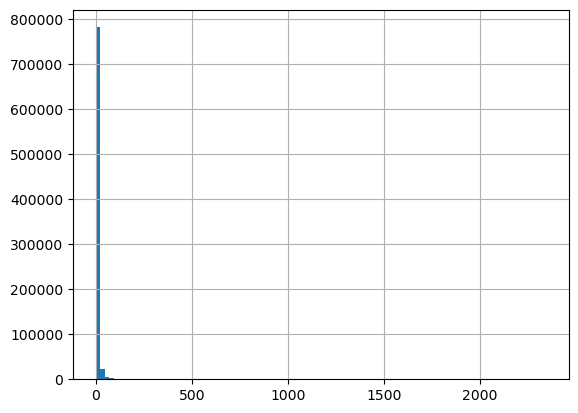

In [53]:
sales['total_quantity'].hist(bins=100)

1) У нас все еще остались минусы, занчит придется вернуться назад и еще пошаманить. 

2) Какие-то мистические выбросы присутствуют... Для начала посмотрим хотя бы больше 200